# Install

In [ ]:
!pip install streamfuels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 3.3 MB/s eta 0:00:00
Cloning into 'StreamFuels'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 145 (delta 77), reused 94 (delta 33), pack-reused 0 (from 0)
Receiving objects: 100% (145/145), 99.58 KiB | 1.81 MiB/s, done.
Resolving deltas: 100% (77/77), done.
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  se

# Import DatasetLoader from StreamFuels

In [2]:
from streamfuels.datasets import DatasetLoader
loader = DatasetLoader()

# Additional libraries for this notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fuel Classification
From the monthly fuel sales dataset

In [3]:
df = loader.fuel_type_classification()
df.head(5)

dataset downloaded at: ./fuel_type_classification.tsf


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,label
0,0.937711,-0.804479,-1.002469,0.435951,-1.418243,-0.106512,-0.223090,-0.494080,0.061665,-0.726989,2.322176,1.018359,ethanol
1,-0.208960,-0.527648,0.125916,-0.801553,2.784311,1.251003,0.087244,-0.828619,-0.770111,-0.332958,-0.368035,-0.410590,ethanol
2,0.235901,-0.720729,-0.659616,-0.203005,-0.239643,-0.284093,1.720811,1.236119,-0.206170,0.966724,-2.272187,0.425889,ethanol
3,1.774912,1.331419,0.011724,1.084923,-1.878683,0.590058,-0.317771,-0.511967,-0.932614,-0.142796,-0.864949,-0.144255,ethanol
4,0.719951,0.110207,-1.210560,1.269346,-0.998101,1.264763,1.410154,-0.876278,-1.698492,0.057707,-0.299310,0.250613,ethanol


Analysis of class distribution

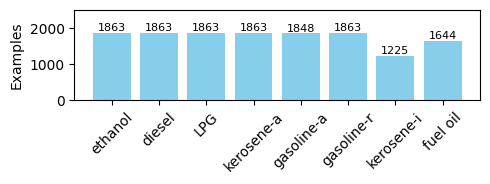

In [ ]:
targets = df['label'].values
count = Counter(targets)

categories = list(count.keys())
freq = list(count.values())

plt.figure(figsize=(5, 2))
bars = plt.bar(categories, freq, color='skyblue')
plt.ylabel('Examples')
plt.ylim([0,2500])
plt.xticks(rotation=45)


for b in bars:
    height = b.get_height()
    plt.text(b.get_x() + b.get_width() / 2, height,
             str(height), ha='center', va='bottom', fontsize=8)

plt.tight_layout()


Split the dataset in training (70%) and test (30%)

In [4]:
data = df.drop(columns=['label']).values
targets = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.3, random_state=6, stratify=targets
)

Train and test a Random Forest and 1NN classifiers

In [5]:
clf1 = RandomForestClassifier(random_state=42)
clf1.fit(X_train, y_train)

clf2 = KNeighborsClassifier(n_neighbors=1)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

Random Forest results: 
               precision    recall  f1-score   support

         LPG       0.61      0.75      0.67       559
      diesel       0.53      0.65      0.58       559
     ethanol       0.49      0.49      0.49       559
    fuel oil       0.33      0.26      0.29       493
  gasoline-a       0.33      0.36      0.35       554
  gasoline-r       0.60      0.64      0.62       559
  kerosene-a       0.52      0.45      0.48       559
  kerosene-i       0.36      0.20      0.26       368

    accuracy                           0.49      4210
   macro avg       0.47      0.48      0.47      4210
weighted avg       0.48      0.49      0.48      4210



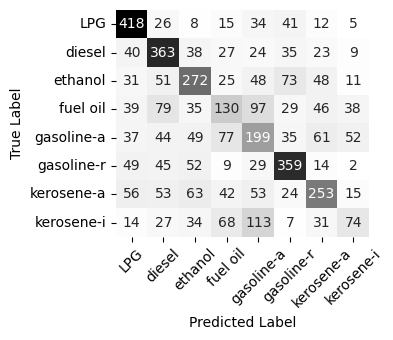

In [29]:
print(f'Random Forest results: \n {classification_report(y_test, y_pred1)}')
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Grays", cbar=False, xticklabels=np.unique(targets), yticklabels=np.unique(targets))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("classification_matrix_RF.pdf", format="pdf", bbox_inches="tight")

1NN results: 
               precision    recall  f1-score   support

         LPG       0.62      0.71      0.66       559
      diesel       0.55      0.58      0.56       559
     ethanol       0.44      0.49      0.47       559
    fuel oil       0.25      0.22      0.23       493
  gasoline-a       0.32      0.25      0.28       554
  gasoline-r       0.55      0.62      0.59       559
  kerosene-a       0.43      0.44      0.43       559
  kerosene-i       0.29      0.25      0.27       368

    accuracy                           0.46      4210
   macro avg       0.43      0.44      0.44      4210
weighted avg       0.44      0.46      0.45      4210



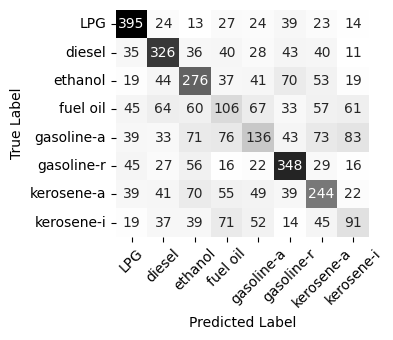

In [30]:
print(f'1NN results: \n {classification_report(y_test, y_pred2)}')
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Grays", cbar=False, xticklabels=np.unique(targets), yticklabels=np.unique(targets))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("classification_matrix_kNN.pdf", format="pdf", bbox_inches="tight")